- **EDA STARBUCKS**

In [2]:
import pandas as pd

# Cargar los dataframes desde los archivos parquet
df = pd.read_parquet('../data/Starbucks_reviews_ETL_limpio.parquet')
df1 = pd.read_parquet('../data/Starbucks_metadata_ETL_limpio.parquet')

# Unir los dataframes en una columna común (asumiendo que 'gmap_id' es la columna común)
merged_df = pd.merge(df, df1, on='gmap_id')

In [20]:
merged_df.head()

,user_id,name_x,time,rating,text,gmap_id,name_y,address,state,num_of_reviews,avg_rating,price,latitude,longitude,category,description,hours,MISC,relative_results,url
0,100107003653040726165,Jacob McCalpin,2017-09-21 09:22:11,5,Chanel is the greatest barista of all time. I'...,0x88891beed225fed1:0x3c63ad3e69972d22,Starbucks,"Starbucks, 1400 University Blvd, Birmingham, A...",AL,18,2.6,Moderate,33.501601,-86.807263,"[Coffee shop, Cafe, Coffee store, Espresso bar]",Seattle-based coffeehouse chain known for its ...,"[[Saturday, 10AM–1:30PM], [Sunday, Closed], [M...",{'Accessibility': ['Wheelchair accessible entr...,"[0x88891bc276c68cf9:0x669c302b2c5da34e, 0x8889...",https://www.google.com/maps/place//data=!4m2!3...
1,108921061266588850634,Alex Z,2018-10-03 12:11:08,2,The food is always warm and delicious but the ...,0x88891beed225fed1:0x3c63ad3e69972d22,Starbucks,"Starbucks, 1400 University Blvd, Birmingham, A...",AL,18,2.6,Moderate,33.501601,-86.807263,"[Coffee shop, Cafe, Coffee store, Espresso bar]",Seattle-based coffeehouse chain known for its ...,"[[Saturday, 10AM–1:30PM], [Sunday, Closed], [M...",{'Accessibility': ['Wheelchair accessible entr...,"[0x88891bc276c68cf9:0x669c302b2c5da34e, 0x8889...",https://www.google.com/maps/place//data=!4m2!3...
2,115087327175786879005,James Drummond,2019-05-06 01:42:12,1,The location is a franchise of sorts operated ...,0x88891beed225fed1:0x3c63ad3e69972d22,Starbucks,"Starbucks, 1400 University Blvd, Birmingham, A...",AL,18,2.6,Moderate,33.501601,-86.807263,"[Coffee shop, Cafe, Coffee store, Espresso bar]",Seattle-based coffeehouse chain known for its ...,"[[Saturday, 10AM–1:30PM], [Sunday, Closed], [M...",{'Accessibility': ['Wheelchair accessible entr...,"[0x88891bc276c68cf9:0x669c302b2c5da34e, 0x8889...",https://www.google.com/maps/place//data=!4m2!3...
3,103797448577708424762,Matthew Pearson,2019-04-19 12:10:35,1,Go to the one in Sterne. This place is a mess....,0x88891beed225fed1:0x3c63ad3e69972d22,Starbucks,"Starbucks, 1400 University Blvd, Birmingham, A...",AL,18,2.6,Moderate,33.501601,-86.807263,"[Coffee shop, Cafe, Coffee store, Espresso bar]",Seattle-based coffeehouse chain known for its ...,"[[Saturday, 10AM–1:30PM], [Sunday, Closed], [M...",{'Accessibility': ['Wheelchair accessible entr...,"[0x88891bc276c68cf9:0x669c302b2c5da34e, 0x8889...",https://www.google.com/maps/place//data=!4m2!3...
4,104674782787422072897,Craig Winn,2018-08-19 00:06:29,5,Open early and well staffed.,0x88891beed225fed1:0x3c63ad3e69972d22,Starbucks,"Starbucks, 1400 University Blvd, Birmingham, A...",AL,18,2.6,Moderate,33.501601,-86.807263,"[Coffee shop, Cafe, Coffee store, Espresso bar]",Seattle-based coffeehouse chain known for its ...,"[[Saturday, 10AM–1:30PM], [Sunday, Closed], [M...",{'Accessibility': ['Wheelchair accessible entr...,"[0x88891bc276c68cf9:0x669c302b2c5da34e, 0x8889...",https://www.google.com/maps/place//data=!4m2!3...


In [21]:
merged_df.to_parquet('../data/merged_starbucks(x gmap_id)')

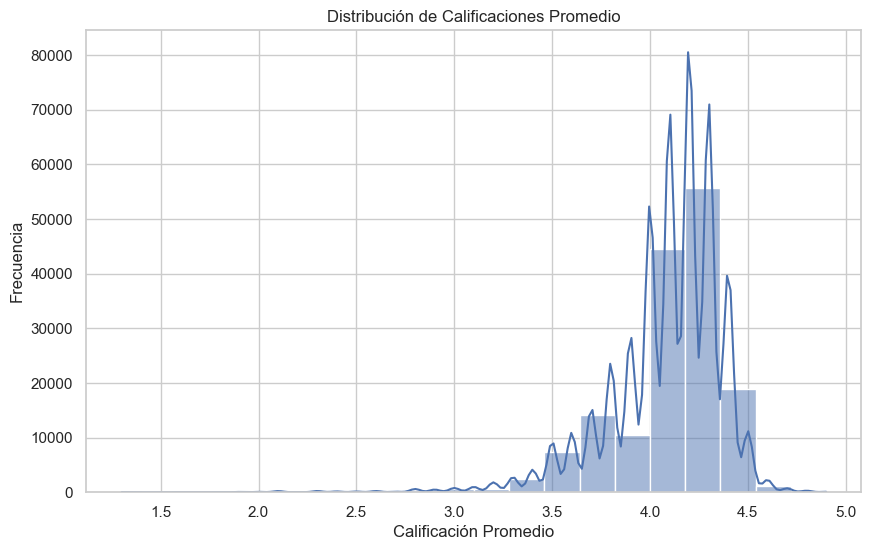

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración de estilo para los gráficos
sns.set(style='whitegrid')

# Columnas importantes para el análisis
important_columns = ['avg_rating', 'num_of_reviews', 'price', 'state', 'rating']

# Exploración de la distribución de las calificaciones promedio
plt.figure(figsize=(10, 6))
sns.histplot(merged_df['avg_rating'], bins=20, kde=True)
plt.title('Distribución de Calificaciones Promedio')
plt.xlabel('Calificación Promedio')
plt.ylabel('Frecuencia')
plt.show()

- **La mayoría de las calificaciones promedio se concentran alrededor de 3.5 a 4.5, lo que indica que la mayoría de las tiendas Starbucks tienen una calificación bastante buena.**

In [4]:
# Verifique los tipos de datos para identificar posibles problemas con la agregación
merged_df.dtypes

# Intentar agrupar por 'GMAP_ID' y agregue las columnas restantes tomando valores únicos

df_agrupados = merged_df.groupby('gmap_id').agg(lambda x: x.drop_duplicates().tolist() if pd.api.types.is_object_dtype(x) else x.unique().tolist()).reset_index()

# Display the first few rows of the grouped dataframe
df_agrupados.head()

,gmap_id,user_id,name_x,time,rating,text,name_y,address,state,num_of_reviews,avg_rating,price,latitude,longitude,category,description,hours,MISC,relative_results,url
0,0x4cb204000ffe30e5:0xa7ac14186a5f5a6e,"[106683231759012064520, 106963995335504393272,...","[Brooke Jansen, Chelsie Boynton, VintageClassi...","[2021-02-01 15:39:07, 2021-04-22 08:07:27, 202...","[5, 1, 3, 4, 2]",[100% worth it to get my dog a pupaccino. New ...,[Starbucks],"[Starbucks, 274 Western Ave, Augusta, Me 04330...",[ME],[448],[4.1],[Moderate],[44.314715],[-69.804681],"[[Coffee shop, Breakfast restaurant, Cafe, Cof...",[Seattle-based coffeehouse chain known for its...,"[[[Friday, 5:30AM–9PM], [Saturday, 6AM–9PM], [...",[{'Accessibility': ['Wheelchair-accessible car...,"[[0x4cb203d84bd033bb:0x9bad233af6634b65, 0x4cb...",[https://www.google.com/maps/place//data=!4m2!...
1,0x4cb206a9e6afff7f:0x4cd3e00632f903cd,"[118215583941292611400, 116651514692242373923,...","[Marcia Kay, Shirley Ayala, Aubrey Knorr, Troy...","[2021-04-20 22:09:14, 2018-07-07 22:03:46, 201...","[5, 4, 1, 2, 3]",[I have never had a bad experience at this Sta...,[Starbucks],"[Starbucks, 43 Crossing Way, Augusta, Me 04330]",[ME],[48],[3.8],[Moderate],[44.310145999999996],[-69.80653],"[[Coffee shop, Cafe, Coffee store, Espresso bar]]",[Seattle-based coffeehouse chain known for its...,"[[[Wednesday, 8AM–8PM], [Thursday, 8AM–8PM], [...",[{'Accessibility': ['Wheelchair accessible ent...,"[[0x4cb203d84bd033bb:0x9bad233af6634b65, 0x4cb...",[https://www.google.com/maps/place//data=!4m2!...
2,0x4cb298b49db8e7d7:0x511c14c2cef94af1,"[111091105762495070793, 110510744206022083945,...","[Seth Reynolds, Heather Rose Nelson, alan bark...","[2018-10-21 14:11:00, 2019-11-14 16:07:30, 202...","[3, 5, 4, 1, 2]",[I come here relatively often- only because of...,[Starbucks],"[Starbucks, 210 Us-1, Scarborough, Me 04074]",[ME],[206],[4.2],[Moderate],[43.591482],[-70.330925],"[[Coffee shop, Breakfast restaurant, Cafe, Cof...",[Seattle-based coffeehouse chain known for its...,"[[[Tuesday, 5AM–9PM], [Wednesday, 5AM–9PM], [T...",[{'Accessibility': ['Wheelchair accessible ent...,"[[0x4cb298aff67347f3:0x48c7374341f467c0, 0x4cb...",[https://www.google.com/maps/place//data=!4m2!...
3,0x4cb29b3d3824e409:0x2a73a5ecc700b03c,"[113239410160527446903, 102814330295069332026,...","[Jasin, Jo-Nell Martin, Avik Dutta, Arron Veys...","[2021-04-03 12:49:21, 2021-03-05 17:38:11, 201...","[5, 4, 1, 2, 3]","[Great staff, very personable and friendly. I ...",[Starbucks],"[Starbucks, 91 Auburn St, Portland, Me 04103]",[ME],[113],[4.1],[Moderate],[43.70276],[-70.288539],"[[Coffee shop, Breakfast restaurant, Cafe, Cof...",[Seattle-based coffeehouse chain known for its...,"[[[Saturday, 6AM–6:30PM], [Sunday, 6AM–6:30PM]...",[{'Accessibility': ['Wheelchair accessible ent...,"[[0x4cb29c6e8e0ad67d:0x16b2cb35f458f92, 0x4cb2...",[https://www.google.com/maps/place//data=!4m2!...
4,0x4cb29f0baa70cc2b:0xdd1eb4468b30b9f5,"[102737282901554388704, 109808999952810016658,...","[David Kellogg, Kelly Turner, Kurt Otterstein,...","[2021-03-24 17:50:23, 2021-04-21 01:46:44, 202...","[5, 2, 4, 3, 1]",[We loved our coffees. They were made just rig...,[Starbucks],"[Starbucks, 50 Market St, South Portland, Me 0...",[ME],[68],[4.2],[Moderate],[43.635334],[-70.255585],"[[Coffee shop, Breakfast restaurant, Cafe, Cof...",[Seattle-based coffeehouse chain known for its...,"[[[Friday, 5AM–9PM], [Saturday, 5AM–9PM], [Sun...",[{'Accessibility': ['Wheelchair accessible ent...,[None],[https://www.google.com/maps/place//data=!4m2!...


In [5]:
# Asegúrese de que todos los valores en las columnas especificadas sean cadenas y luego retire los soportes correctamente
columnas_a_limpiar = ['name_x', 'address', 'description', 'latitude', 'longitude', 'avg_rating','name_y','state','text','num_of_reviews', 'price', 'url', 'state']
for column in columnas_a_limpiar:
    df_agrupados[column] = df_agrupados[column].astype(str).str.replace(r'^\[|\]$', '', regex=True)

# Verificar los cambios
for column in columnas_a_limpiar:
    print('Column:', column)
    print(df_agrupados[column].head(10))
    print('\
')

Column: name_x
0    'Brooke Jansen', 'Chelsie Boynton', 'VintageCl...
1    'Marcia Kay', 'Shirley Ayala', 'Aubrey Knorr',...
2    'Seth Reynolds', 'Heather Rose Nelson', 'alan ...
3    'Jasin', 'Jo-Nell Martin', 'Avik Dutta', 'Arro...
4    'David Kellogg', 'Kelly Turner', 'Kurt Otterst...
5    'Sidious1966', 'M.Evergreen', 'Andrew Bessette...
6    'Tony Thompson', 'Dee Ramos', 'Parker Bosel', ...
7    'Mary A. Shaffer', 'Melissa Witte', 'Kevin', '...
8    'Clyde Magnuson', 'Kristen Stvincent', 'Barb B...
9    'Mary Rhodes', 'Adam Kicker', 'Jennifer Mannin...
Name: name_x, dtype: object

Column: address
0    'Starbucks, 274 Western Ave, Augusta, Me 04330...
1      'Starbucks, 43 Crossing Way, Augusta, Me 04330'
2         'Starbucks, 210 Us-1, Scarborough, Me 04074'
3        'Starbucks, 91 Auburn St, Portland, Me 04103'
4    'Starbucks, 50 Market St, South Portland, Me 0...
5    'Starbucks, 18 Lower Mountain View Dr, Colches...
6    'Starbucks, 1138 3 Mile Rd, Sault Ste. Marie, ...
7    

In [6]:
df_agrupados.head()

,gmap_id,user_id,name_x,time,rating,text,name_y,address,state,num_of_reviews,avg_rating,price,latitude,longitude,category,description,hours,MISC,relative_results,url
0,0x4cb204000ffe30e5:0xa7ac14186a5f5a6e,"[106683231759012064520, 106963995335504393272,...","'Brooke Jansen', 'Chelsie Boynton', 'VintageCl...","[2021-02-01 15:39:07, 2021-04-22 08:07:27, 202...","[5, 1, 3, 4, 2]","""100% worth it to get my dog a pupaccino. New ...",'Starbucks',"'Starbucks, 274 Western Ave, Augusta, Me 04330...",'ME',448,4.1,'Moderate',44.314715,-69.804681,"[[Coffee shop, Breakfast restaurant, Cafe, Cof...",'Seattle-based coffeehouse chain known for its...,"[[[Friday, 5:30AM–9PM], [Saturday, 6AM–9PM], [...",[{'Accessibility': ['Wheelchair-accessible car...,"[[0x4cb203d84bd033bb:0x9bad233af6634b65, 0x4cb...",'https://www.google.com/maps/place//data=!4m2!...
1,0x4cb206a9e6afff7f:0x4cd3e00632f903cd,"[118215583941292611400, 116651514692242373923,...","'Marcia Kay', 'Shirley Ayala', 'Aubrey Knorr',...","[2021-04-20 22:09:14, 2018-07-07 22:03:46, 201...","[5, 4, 1, 2, 3]","""I have never had a bad experience at this Sta...",'Starbucks',"'Starbucks, 43 Crossing Way, Augusta, Me 04330'",'ME',48,3.8,'Moderate',44.310145999999996,-69.80653,"[[Coffee shop, Cafe, Coffee store, Espresso bar]]",'Seattle-based coffeehouse chain known for its...,"[[[Wednesday, 8AM–8PM], [Thursday, 8AM–8PM], [...",[{'Accessibility': ['Wheelchair accessible ent...,"[[0x4cb203d84bd033bb:0x9bad233af6634b65, 0x4cb...",'https://www.google.com/maps/place//data=!4m2!...
2,0x4cb298b49db8e7d7:0x511c14c2cef94af1,"[111091105762495070793, 110510744206022083945,...","'Seth Reynolds', 'Heather Rose Nelson', 'alan ...","[2018-10-21 14:11:00, 2019-11-14 16:07:30, 202...","[3, 5, 4, 1, 2]",'I come here relatively often- only because of...,'Starbucks',"'Starbucks, 210 Us-1, Scarborough, Me 04074'",'ME',206,4.2,'Moderate',43.591482,-70.330925,"[[Coffee shop, Breakfast restaurant, Cafe, Cof...",'Seattle-based coffeehouse chain known for its...,"[[[Tuesday, 5AM–9PM], [Wednesday, 5AM–9PM], [T...",[{'Accessibility': ['Wheelchair accessible ent...,"[[0x4cb298aff67347f3:0x48c7374341f467c0, 0x4cb...",'https://www.google.com/maps/place//data=!4m2!...
3,0x4cb29b3d3824e409:0x2a73a5ecc700b03c,"[113239410160527446903, 102814330295069332026,...","'Jasin', 'Jo-Nell Martin', 'Avik Dutta', 'Arro...","[2021-04-03 12:49:21, 2021-03-05 17:38:11, 201...","[5, 4, 1, 2, 3]","'Great staff, very personable and friendly. I ...",'Starbucks',"'Starbucks, 91 Auburn St, Portland, Me 04103'",'ME',113,4.1,'Moderate',43.70276,-70.288539,"[[Coffee shop, Breakfast restaurant, Cafe, Cof...",'Seattle-based coffeehouse chain known for its...,"[[[Saturday, 6AM–6:30PM], [Sunday, 6AM–6:30PM]...",[{'Accessibility': ['Wheelchair accessible ent...,"[[0x4cb29c6e8e0ad67d:0x16b2cb35f458f92, 0x4cb2...",'https://www.google.com/maps/place//data=!4m2!...
4,0x4cb29f0baa70cc2b:0xdd1eb4468b30b9f5,"[102737282901554388704, 109808999952810016658,...","'David Kellogg', 'Kelly Turner', 'Kurt Otterst...","[2021-03-24 17:50:23, 2021-04-21 01:46:44, 202...","[5, 2, 4, 3, 1]","""We loved our coffees. They were made just rig...",'Starbucks',"'Starbucks, 50 Market St, South Portland, Me 0...",'ME',68,4.2,'Moderate',43.635334,-70.255585,"[[Coffee shop, Breakfast restaurant, Cafe, Cof...",'Seattle-based coffeehouse chain known for its...,"[[[Friday, 5AM–9PM], [Saturday, 5AM–9PM], [Sun...",[{'Accessibility': ['Wheelchair accessible ent...,[None],'https://www.google.com/maps/place//data=!4m2!...


In [7]:
# Realizar un análisis estadístico según la columna "state" y el número de reseñas
estadisticas_estado = df_agrupados.groupby('state').size().reset_index(name='num_reviews')

# Mostrar las primeras filas del resultado
print(estadisticas_estado.head())

# Descripción estadística del número de reseñas por estado
description = estadisticas_estado['num_reviews'].describe()
print(description)

  state  num_reviews
0  'AK'           21
1  'AL'           14
2  'AR'           18
3  'AZ'          106
4  'CA'          214
count     52.000000
mean      43.346154
std       41.694917
min        1.000000
25%       11.750000
50%       31.500000
75%       66.750000
max      214.000000
Name: num_reviews, dtype: float64


- Distribución de Reseñas por Estado: 

La mayoría de los estados tienen un número bajo de reseñas, con una mediana de 2 reseñas por estado. Sin embargo, hay algunos estados con un número significativamente mayor de reseñas, como se observa en el valor máximo de 496 reseñas.

- Estadísticas Descriptivas:

Media:El número promedio de reseñas por estado es aproximadamente 16.49.
Desviación Estándar: La desviación estándar es bastante alta (57.36), lo que indica una gran variabilidad en el número de reseñas entre los estados.
Percentiles: El 25% de los estados tienen 1 o menos reseñas, el 50% tienen 2 o menos, y el 75% tienen 8 o menos reseñas.

In [8]:
df_agrupados.to_parquet('../data/merged_starbucks_agrupado(uniico gmap_id).parquet')

In [10]:
# Convertir la columna 'num_of_reviews' a tipo numérico
df_agrupados['num_of_reviews'] = pd.to_numeric(df_agrupados['num_of_reviews'], errors='coerce')

# Crear rangos para el número de reseñas
bins = [0, 10, 50, 100, 500, 1000, float('inf')]
labels = ['0-10', '11-50', '51-100', '101-500', '501-1000', '1000+']
df_agrupados['review_range'] = pd.cut(df_agrupados['num_of_reviews'], bins=bins, labels=labels, right=False)

# Guardar el dataframe modificado
df_agrupados.to_parquet('../data/merged_starbucks_agrupado_con_rangos_de_reviews.parquet')

# Mostrar las primeras filas del dataframe con la nueva columna
df_agrupados.head()

,gmap_id,user_id,name_x,time,rating,text,name_y,address,state,num_of_reviews,...,price,latitude,longitude,category,description,hours,MISC,relative_results,url,review_range
0,0x4cb204000ffe30e5:0xa7ac14186a5f5a6e,"[106683231759012064520, 106963995335504393272,...","'Brooke Jansen', 'Chelsie Boynton', 'VintageCl...","[2021-02-01 15:39:07, 2021-04-22 08:07:27, 202...","[5, 1, 3, 4, 2]","""100% worth it to get my dog a pupaccino. New ...",'Starbucks',"'Starbucks, 274 Western Ave, Augusta, Me 04330...",'ME',448,...,'Moderate',44.314715,-69.804681,"[[Coffee shop, Breakfast restaurant, Cafe, Cof...",'Seattle-based coffeehouse chain known for its...,"[[[Friday, 5:30AM–9PM], [Saturday, 6AM–9PM], [...",[{'Accessibility': ['Wheelchair-accessible car...,"[[0x4cb203d84bd033bb:0x9bad233af6634b65, 0x4cb...",'https://www.google.com/maps/place//data=!4m2!...,101-500
1,0x4cb206a9e6afff7f:0x4cd3e00632f903cd,"[118215583941292611400, 116651514692242373923,...","'Marcia Kay', 'Shirley Ayala', 'Aubrey Knorr',...","[2021-04-20 22:09:14, 2018-07-07 22:03:46, 201...","[5, 4, 1, 2, 3]","""I have never had a bad experience at this Sta...",'Starbucks',"'Starbucks, 43 Crossing Way, Augusta, Me 04330'",'ME',48,...,'Moderate',44.310145999999996,-69.80653,"[[Coffee shop, Cafe, Coffee store, Espresso bar]]",'Seattle-based coffeehouse chain known for its...,"[[[Wednesday, 8AM–8PM], [Thursday, 8AM–8PM], [...",[{'Accessibility': ['Wheelchair accessible ent...,"[[0x4cb203d84bd033bb:0x9bad233af6634b65, 0x4cb...",'https://www.google.com/maps/place//data=!4m2!...,11-50
2,0x4cb298b49db8e7d7:0x511c14c2cef94af1,"[111091105762495070793, 110510744206022083945,...","'Seth Reynolds', 'Heather Rose Nelson', 'alan ...","[2018-10-21 14:11:00, 2019-11-14 16:07:30, 202...","[3, 5, 4, 1, 2]",'I come here relatively often- only because of...,'Starbucks',"'Starbucks, 210 Us-1, Scarborough, Me 04074'",'ME',206,...,'Moderate',43.591482,-70.330925,"[[Coffee shop, Breakfast restaurant, Cafe, Cof...",'Seattle-based coffeehouse chain known for its...,"[[[Tuesday, 5AM–9PM], [Wednesday, 5AM–9PM], [T...",[{'Accessibility': ['Wheelchair accessible ent...,"[[0x4cb298aff67347f3:0x48c7374341f467c0, 0x4cb...",'https://www.google.com/maps/place//data=!4m2!...,101-500
3,0x4cb29b3d3824e409:0x2a73a5ecc700b03c,"[113239410160527446903, 102814330295069332026,...","'Jasin', 'Jo-Nell Martin', 'Avik Dutta', 'Arro...","[2021-04-03 12:49:21, 2021-03-05 17:38:11, 201...","[5, 4, 1, 2, 3]","'Great staff, very personable and friendly. I ...",'Starbucks',"'Starbucks, 91 Auburn St, Portland, Me 04103'",'ME',113,...,'Moderate',43.70276,-70.288539,"[[Coffee shop, Breakfast restaurant, Cafe, Cof...",'Seattle-based coffeehouse chain known for its...,"[[[Saturday, 6AM–6:30PM], [Sunday, 6AM–6:30PM]...",[{'Accessibility': ['Wheelchair accessible ent...,"[[0x4cb29c6e8e0ad67d:0x16b2cb35f458f92, 0x4cb2...",'https://www.google.com/maps/place//data=!4m2!...,101-500
4,0x4cb29f0baa70cc2b:0xdd1eb4468b30b9f5,"[102737282901554388704, 109808999952810016658,...","'David Kellogg', 'Kelly Turner', 'Kurt Otterst...","[2021-03-24 17:50:23, 2021-04-21 01:46:44, 202...","[5, 2, 4, 3, 1]","""We loved our coffees. They were made just rig...",'Starbucks',"'Starbucks, 50 Market St, South Portland, Me 0...",'ME',68,...,'Moderate',43.635334,-70.255585,"[[Coffee shop, Breakfast restaurant, Cafe, Cof...",'Seattle-based coffeehouse chain known for its...,"[[[Friday, 5AM–9PM], [Saturday, 5AM–9PM], [Sun...",[{'Accessibility': ['Wheelchair accessible ent...,[None],'https://www.google.com/maps/place//data=!4m2!...,51-100


In [11]:
import pandas as pd
import plotly.express as px


# Crear el gráfico con Plotly
fig = px.histogram(df_agrupados, x='review_range', title='Distribución de los Rangos de Reseñas', labels={'review_range': 'Rango de Reseñas', 'count': 'Frecuencia'})

# Mejorar la estética del gráfico con fondo negro
fig.update_layout(
    title_font=dict(size=24, family='Arial, sans-serif', color='white'),
    xaxis_title_font=dict(size=18, family='Arial, sans-serif', color='white'),
    yaxis_title_font=dict(size=18, family='Arial, sans-serif', color='white'),
    xaxis_tickfont=dict(size=14, family='Arial, sans-serif', color='white'),
    yaxis_tickfont=dict(size=14, family='Arial, sans-serif', color='white'),
    bargap=0.2,
    yaxis_title='Frecuencia',
    plot_bgcolor='black',
    paper_bgcolor='black'
)

# Guardar el gráfico como HTML
fig.write_html('review_ranges_distribution_black_background.html')

# Mostrar el gráfico
fig.show()

- **La mayoría de las tiendas tienen menos de 50 reseñas, con algunas excepciones que tienen un número significativamente mayor de reseñas.Entre todas las cantidades de reseñas posibles, 18 es la que se observa con mayor regularidad en las tiendas. Por lo tanto es la moda**

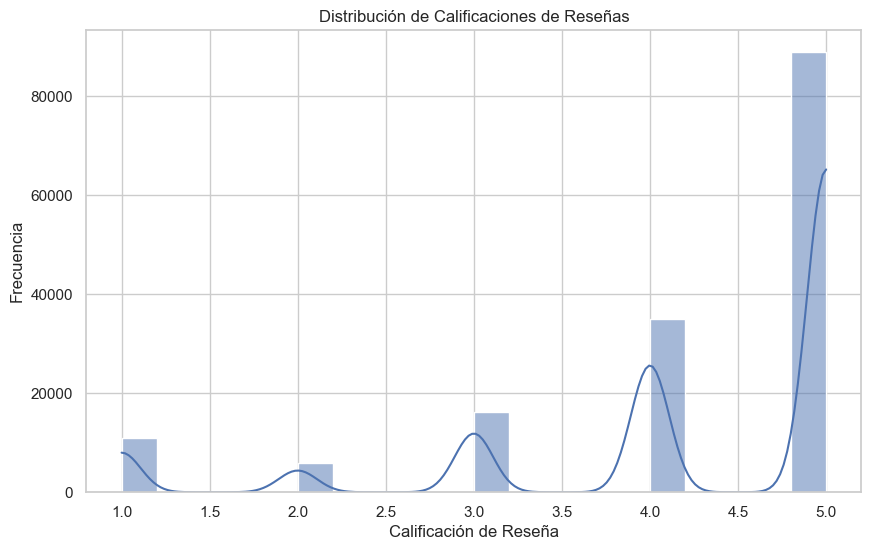

In [14]:
# Exploración de la distribución de calificaciones de reseñas
plt.figure(figsize=(10, 6))
sns.histplot(df['rating'], bins=20, kde=True)
plt.title('Distribución de Calificaciones de Reseñas')
plt.xlabel('Calificación de Reseña')
plt.ylabel('Frecuencia')
plt.show()

- **Las calificaciones de las reseñas individuales también tienden a concentrarse en el rango de 3 a 5 estrellas, lo que sugiere una satisfacción general positiva entre los clientes.**

In [6]:
# Crear un gráfico de barras con el número de reviews por estado usando Plotly
import plotly.express as px
df = pd.read_parquet('../data/Starbucks_metadata_ETL_limpio.parquet')

# Agrupar por estado y sumar el número de reviews
reviews_by_state = df.groupby('state')['num_of_reviews'].sum().reset_index()

# Ordenar los datos por número de reviews
reviews_by_state = reviews_by_state.sort_values(by='num_of_reviews', ascending=False)

# Crear el gráfico
fig = px.bar(reviews_by_state, x='state', y='num_of_reviews', 
             title='Número de Reviews por Estado', 
             labels={'num_of_reviews': 'Número de Reviews', 'state': 'Estado'}, 
             color='num_of_reviews', color_continuous_scale='Viridis')

# Mostrar el gráfico
fig.show()

- **La gráfica muestra la distribución del número de reviews por estado, con los nombres de los estados en el eje X. Se observa que algunos estados tienen una cantidad significativamente mayor de reviews en comparación con otros. Se puede examinar una cantidad significativamente mayor de reseñas en California en comparación con otros estados, superando los 50700.**

- **Surge la necesidad de ajustar la representación gráfica actual, ya que la distribución de las revisiones por estado refleja, en gran medida, la variación poblacional entre ellos. Para abordar esta situación, se propone normalizar los datos dividiendo el número de revisiones por estado por la cantidad de tiendas presentes en cada uno:**

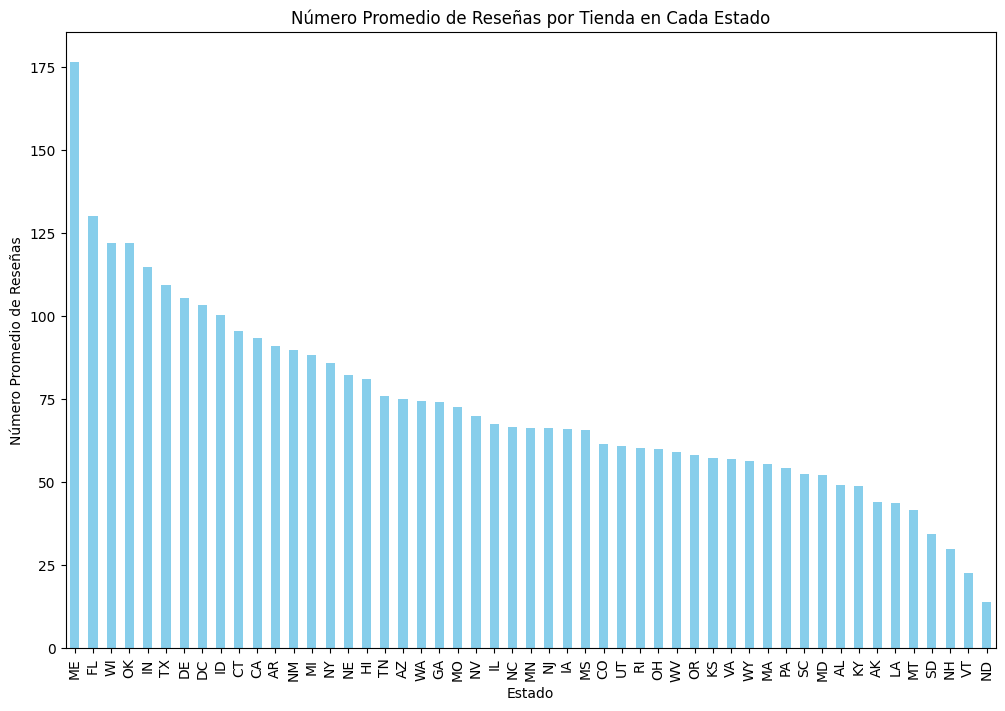

In [10]:
# Este código genera un gráfico de barras con el número promedio de reseñas por tienda en cada estado.

import pandas as pd
import matplotlib.pyplot as plt

# Agrupar por estado y calcular el número promedio de reseñas por tienda
avg_reviews_by_state = df.groupby('state')['num_of_reviews'].mean().sort_values(ascending=False)

# Crear el gráfico de barras
plt.figure(figsize=(12, 8))
avg_reviews_by_state.plot(kind='bar', color='skyblue')
plt.title('Número Promedio de Reseñas por Tienda en Cada Estado')
plt.xlabel('Estado')
plt.ylabel('Número Promedio de Reseñas')
plt.xticks(rotation=90)
plt.show()

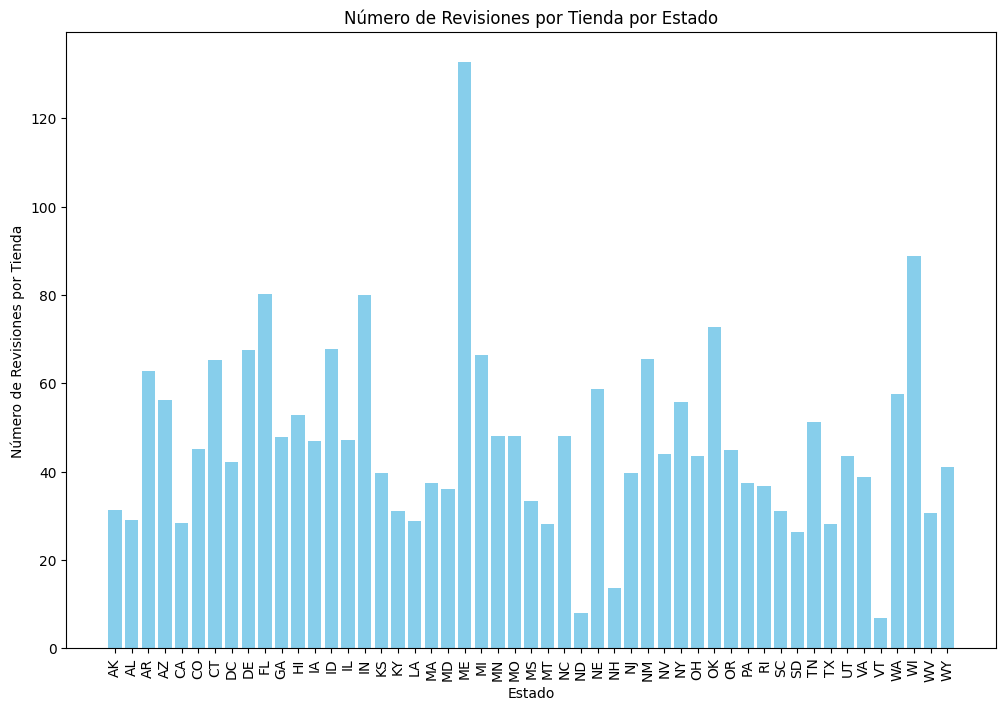

Gráfico generado con éxito.


In [12]:
# Calcular el número de revisiones por tienda por estado y graficar

import pandas as pd
import matplotlib.pyplot as plt
# Calcular el número de revisiones por tienda por estado
reviews_per_store_state = merged_df.groupby(['state', 'gmap_id']).size().reset_index(name='review_count')

# Calcular el número de revisiones por estado
reviews_per_state = reviews_per_store_state.groupby('state')['review_count'].sum().reset_index()

# Calcular el número de tiendas por estado
stores_per_state = df1.groupby('state')['gmap_id'].nunique().reset_index(name='store_count')

# Unir el número de revisiones y el número de tiendas por estado
reviews_and_stores_per_state = pd.merge(reviews_per_state, stores_per_state, on='state')

# Calcular el número de revisiones por tienda por estado
reviews_and_stores_per_state['reviews_per_store'] = reviews_and_stores_per_state['review_count'] / reviews_and_stores_per_state['store_count']

# Graficar
plt.figure(figsize=(12, 8))
plt.bar(reviews_and_stores_per_state['state'], reviews_and_stores_per_state['reviews_per_store'], color='skyblue')
plt.xlabel('Estado')
plt.ylabel('Número de Revisiones por Tienda')
plt.title('Número de Revisiones por Tienda por Estado')
plt.xticks(rotation=90)
plt.show()

print("Gráfico generado con éxito.")

C:\Users\zimme\AppData\Local\Temp\ipykernel_11228\814565098.py:20: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




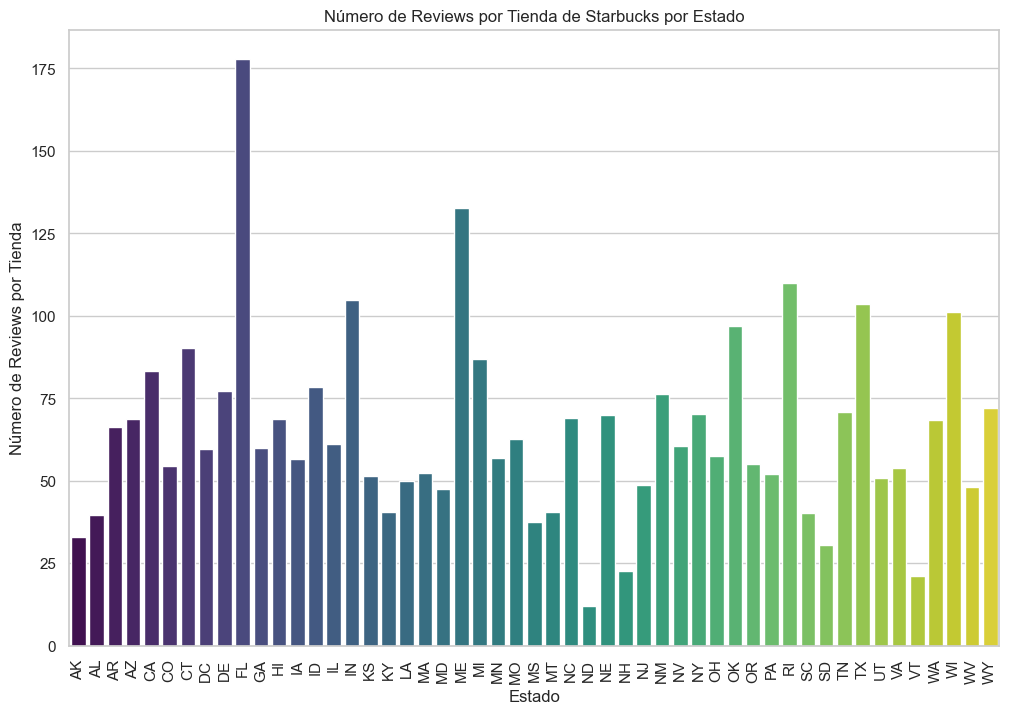

In [19]:
# Habilitar TQDM para pandas
tqdm.pandas()


# Análisis de datos exploratorios centrado la columna 'state' 
# Count the number of reviews per state
conteo_estados = merged_df['state'].value_counts()

# Count the number of unique stores (gmap_id) per state
store_count_per_state = merged_df.groupby('state')['gmap_id'].nunique()

# Calcular el número de revisiones por tienda por estado
reviews_per_store = conteo_estados / store_count_per_state

# Drop NaN values (if any)
reviews_per_store = reviews_per_store.dropna()

# Plot the number of reviews per store by state
plt.figure(figsize=(12, 8))
sns.barplot(x=reviews_per_store.index, y=reviews_per_store.values, palette='viridis')
plt.title('Número de Reviews por Tienda de Starbucks por Estado')
plt.xlabel('Estado')
plt.ylabel('Número de Reviews por Tienda')
plt.xticks(rotation=90)
plt.show()

El gráfico muestra el número promedio de reseñas por tienda de Starbucks en cada estado. A partir de la visualización, se pueden extraer las siguientes conclusiones:

Hay una variabilidad significativa en el número de reseñas por tienda entre los diferentes estados.
Algunos estados tienen un número considerablemente mayor de reseñas por tienda en comparación con otros.
Esta variabilidad puede deberse a factores como la densidad de población, la popularidad de Starbucks en cada estado, y la competencia con otras cafeterías.

In [22]:

# Este código calcula la proporción de reviews por estado y genera un gráfico de barras con Plotly con fondo negro.

# Contar el número de reviews por estado
conteo_estados = merged_df['state'].value_counts().reset_index()
conteo_estados.columns = ['state', 'num_reviews']

# Calcular las proporciones de reviews por estado
conteo_estados['proportion_reviews'] = conteo_estados['num_reviews'] / conteo_estados['num_reviews'].sum()

# Graficar las proporciones con Plotly
fig = px.bar(conteo_estados, x='state', y='proportion_reviews', title='Proporción de Reviews por Estado', labels={'state': 'Estado', 'proportion_reviews': 'Proporción de Reviews'}, color_discrete_sequence=['#1f77b4'])
fig.update_layout(xaxis={'categoryorder':'total descending'}, plot_bgcolor='black', paper_bgcolor='black', font_color='white')
fig.show()

- **Distribución de Reviews: El gráfico muestra la proporción de reviews por estado, lo que permite visualizar qué estados tienen una mayor o menor participación en términos de reviews.**

In [23]:
# Este código calcula el promedio de 'avg_rating' por cada estado y genera un gráfico con Plotly.

# Calcular el promedio de 'avg_rating' por cada estado
avg_rating_by_state = merged_df.groupby('state')['avg_rating'].mean().reset_index()

# Graficar el promedio de 'avg_rating' por cada estado
fig = px.bar(avg_rating_by_state, x='state', y='avg_rating', title='Promedio de Rating por Estado', labels={'state': 'Estado', 'avg_rating': 'Promedio de Rating'})
fig.update_layout(xaxis={'categoryorder':'total descending'})
fig.show()

- **El análisis del gráfico revela una variabilidad moderada en las calificaciones promedio de las tiendas Starbucks por estado. Si bien todas las regiones presentan calificaciones elevadas, no se observan diferencias significativas entre ellas.**

- **EDA STARBUCKS Y DUNKIN(PRINCIPAL COMPETENCIA)**

In [26]:

# Cargar los dataframes de dunkin
df3 = pd.read_parquet('../data/Dunkin_reviews_ETL_limpio.parquet')
df4 = pd.read_parquet('../data/Dunkin_metadata_ETL_limpio.parquet')

# Unir los dataframes en la columna 'gmap_id'
merged_df2 = pd.merge(df3, df4, on='gmap_id')

# Mostrar las primeras filas del dataframe unido
merged_df2.head()

,user_id,name_x,time,rating,text,gmap_id,name_y,address,state,num_of_reviews,avg_rating,price,latitude,longitude,category,description,hours,MISC,relative_results,url
0,104957977998342094168,William Clark,2017-02-15 12:32:04,4,Great coffee and Donuts. Iced tea is also grea...,0x889a4e8a2f05a603:0xea1325e2785d9fb4,Dunkin' Donuts,"Dunkin' Donuts, 1976 Michigan Ave, Mobile, Al ...",AL,25,4.0,Low,30.64615,-88.07757,"[Donut shop, Bagel shop, Bakery, Breakfast res...",Long-running chain serving signature breakfast...,"[[Saturday, 5AM–9PM], [Sunday, 5AM–9PM], [Mond...","{'Accessibility': None, 'Amenities': ['Restroo...","[0x889a4fdde7a5ee2b:0xed5cb142596c6b63, 0x889a...",https://www.google.com/maps/place//data=!4m2!3...
1,117483898282300950125,Birthday Bandit,2017-02-07 16:03:03,5,I stop by here often because it's on my way to...,0x889a4e8a2f05a603:0xea1325e2785d9fb4,Dunkin' Donuts,"Dunkin' Donuts, 1976 Michigan Ave, Mobile, Al ...",AL,25,4.0,Low,30.64615,-88.07757,"[Donut shop, Bagel shop, Bakery, Breakfast res...",Long-running chain serving signature breakfast...,"[[Saturday, 5AM–9PM], [Sunday, 5AM–9PM], [Mond...","{'Accessibility': None, 'Amenities': ['Restroo...","[0x889a4fdde7a5ee2b:0xed5cb142596c6b63, 0x889a...",https://www.google.com/maps/place//data=!4m2!3...
2,114586050187658234891,Michael Connolly,2017-03-14 09:14:44,5,Sad to see this location close up. I stopped h...,0x889a4e8a2f05a603:0xea1325e2785d9fb4,Dunkin' Donuts,"Dunkin' Donuts, 1976 Michigan Ave, Mobile, Al ...",AL,25,4.0,Low,30.64615,-88.07757,"[Donut shop, Bagel shop, Bakery, Breakfast res...",Long-running chain serving signature breakfast...,"[[Saturday, 5AM–9PM], [Sunday, 5AM–9PM], [Mond...","{'Accessibility': None, 'Amenities': ['Restroo...","[0x889a4fdde7a5ee2b:0xed5cb142596c6b63, 0x889a...",https://www.google.com/maps/place//data=!4m2!3...
3,105146756185088866130,Carleen Yates,2015-03-26 11:27:50,5,I had a great experience when I went in the fo...,0x889a4e8a2f05a603:0xea1325e2785d9fb4,Dunkin' Donuts,"Dunkin' Donuts, 1976 Michigan Ave, Mobile, Al ...",AL,25,4.0,Low,30.64615,-88.07757,"[Donut shop, Bagel shop, Bakery, Breakfast res...",Long-running chain serving signature breakfast...,"[[Saturday, 5AM–9PM], [Sunday, 5AM–9PM], [Mond...","{'Accessibility': None, 'Amenities': ['Restroo...","[0x889a4fdde7a5ee2b:0xed5cb142596c6b63, 0x889a...",https://www.google.com/maps/place//data=!4m2!3...
4,105407381034578943677,Ian Cobb,2017-01-11 10:47:11,4,I used to live up north in they only had Dunki...,0x889a4e8a2f05a603:0xea1325e2785d9fb4,Dunkin' Donuts,"Dunkin' Donuts, 1976 Michigan Ave, Mobile, Al ...",AL,25,4.0,Low,30.64615,-88.07757,"[Donut shop, Bagel shop, Bakery, Breakfast res...",Long-running chain serving signature breakfast...,"[[Saturday, 5AM–9PM], [Sunday, 5AM–9PM], [Mond...","{'Accessibility': None, 'Amenities': ['Restroo...","[0x889a4fdde7a5ee2b:0xed5cb142596c6b63, 0x889a...",https://www.google.com/maps/place//data=!4m2!3...


In [29]:
merged_df.to_parquet('../data/merged_dunkin(x gmap_id)')

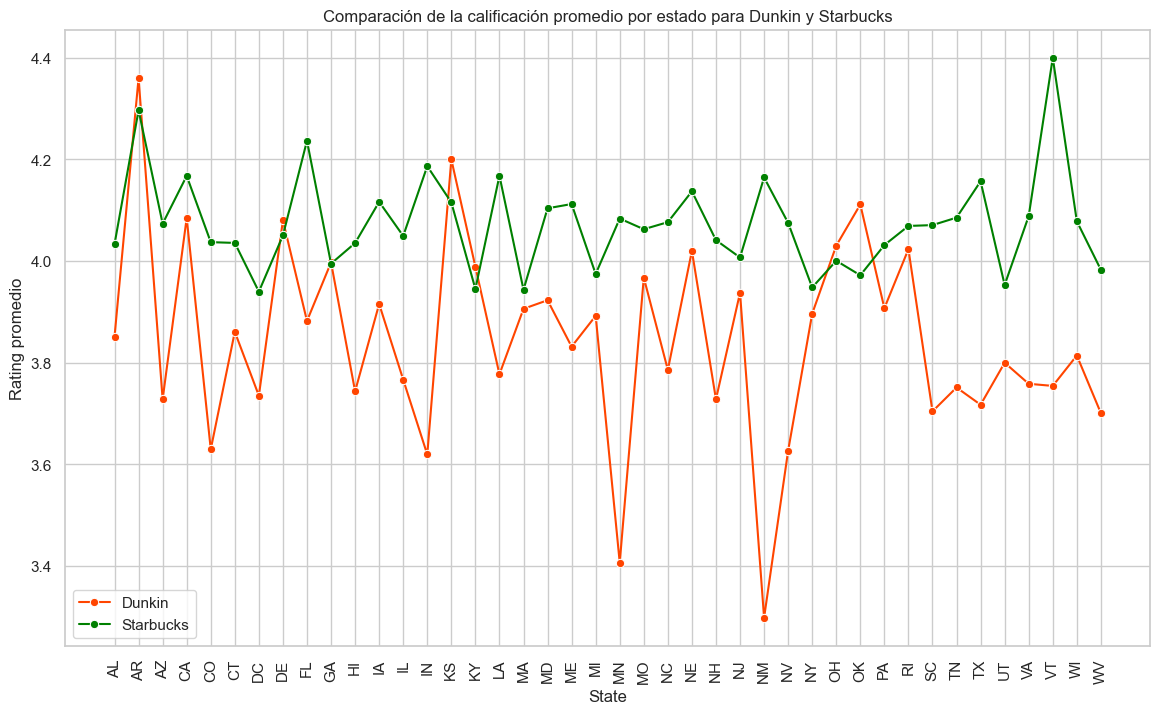

In [27]:
# Agrupar por estado y calcular la media de las calificaciones
mermerged_df2_avg =merged_df2.groupby('state')['avg_rating'].mean().reset_index()
merged_df_avg = merged_df.groupby('state')['avg_rating'].mean().reset_index()

# Renombrar las columnas para diferenciarlas
mermerged_df2_avg.columns = ['state', 'avg_rating_dunkin']
merged_df_avg.columns = ['state', 'avg_rating_starbucks']

# Unir los dos dataframes en uno solo
df_avg_combined = pd.merge(mermerged_df2_avg, merged_df_avg, on='state', how='outer').fillna(0)

# Filtrar los estados que tienen registros de Dunkin
df_avg_combined_filtered = df_avg_combined[df_avg_combined['avg_rating_dunkin'] > 0]

# Crear el gráfico de líneas
plt.figure(figsize=(14, 8))

# Crear el gráfico de líneas
sns.lineplot(x='state', y='avg_rating_dunkin', data=df_avg_combined_filtered, marker='o', color='#FF4500', label='Dunkin')  # Usar un color naranja más oscuro
sns.lineplot(x='state', y='avg_rating_starbucks', data=df_avg_combined_filtered, marker='o', color='green', label='Starbucks')

# Añadir etiquetas y título
plt.xlabel('State')
plt.ylabel('Rating promedio')
plt.title('Comparación de la calificación promedio por estado para Dunkin y Starbucks')
plt.xticks(rotation=90)
plt.legend()

# Mostrar el gráfico
plt.show()

- **El análisis comparativo facilitado por el gráfico revela diferencias significativas en las calificaciones promedio de las tiendas Dunkin' y Starbucks, desglosadas por estado. Estas disparidades destacan variaciones en la satisfacción del cliente entre ambas cadenas, con Starbucks consistentemente posicionada por encima de Dunkin' en términos de valoración.**

In [30]:
# Importar las bibliotecas necesarias
import pandas as pd
import plotly.express as px


# Agrupar por estado y calcular la media de las calificaciones
merged_df2_avg = merged_df2.groupby('state')['avg_rating'].mean().reset_index()
mermerged_df_avg = merged_df.groupby('state')['avg_rating'].mean().reset_index()

# Renombrar las columnas para diferenciarlas
merged_df2_avg.columns = ['state', 'Rating promedio Dunkin']
mermerged_df_avg.columns = ['state', 'Rating promedio Starbucks']

# Unir los dos dataframes en uno solo
df_avg_combined = pd.merge(merged_df2_avg, mermerged_df_avg, on='state', how='outer').fillna(0)

# Filtrar los estados que tienen registros de Dunkin
df_avg_combined_filtered = df_avg_combined[df_avg_combined['Rating promedio Dunkin'] > 0]

# Crear el gráfico de barras con Plotly
fig = px.bar(df_avg_combined_filtered, x='state', y=['Rating promedio Dunkin', 'Rating promedio Starbucks'],
             barmode='group', labels={'value': 'Average Rating', 'variable': 'Compañia'},
             title='Comparacion de rating promedio de Dunkin y Starbucks',
             color_discrete_map={'Rating promedio Dunkin': '#FF4500', 'Rating promedio Starbucks': 'green'})

# Mostrar el gráfico
fig.show()

print('done')

done


- **Comparación Visual: El gráfico de barras permite una comparación visual clara de las calificaciones promedio de Dunkin y Starbucks por estado, mostrando las diferencias en la satisfacción del cliente entre las dos cadenas.**

In [31]:
# Importar las bibliotecas necesarias
import pandas as pd
import plotly.graph_objects as go


# Calcular la media de las calificaciones a nivel nacional
avg_rating_dunkin = merged_df2['avg_rating'].mean()
avg_rating_starbucks = merged_df['avg_rating'].mean()

# Crear un dataframe con los resultados
df_avg_national = pd.DataFrame({
    'Compañia': ['Dunkin', 'Starbucks'],
    'Rating promedio': [avg_rating_dunkin, avg_rating_starbucks]
})

# Crear el gráfico de barras con Plotly
fig = go.Figure(data=[
    go.Bar(name='Dunkin', x=['Dunkin'], y=[avg_rating_dunkin], marker_color='#FF4500'),
    go.Bar(name='Starbucks', x=['Starbucks'], y=[avg_rating_starbucks], marker_color='green')
])

# Actualizar el layout del gráfico
fig.update_layout(
    title='Rating promedio nacional de Dunkin y Starbucks',
    xaxis_title='Compañia',
    yaxis_title='Rating promedio',
    template='plotly_dark',
    font=dict(size=15)
)

# Mostrar el gráfico
fig.show()

El gráfico de barras proporciona una comparación de las calificaciones promedio en los Estados Unidos de Dunkin' y Starbucks. Los datos revelan una leve ventaja para Starbucks en términos de valoración promedio.

In [34]:
# Importar las bibliotecas necesarias
import pandas as pd
import plotly.express as px

# Agrupar por estado y calcular la media de las calificaciones
merged_df2_avg = merged_df2.groupby('state')['avg_rating'].mean().reset_index()
mermerged_df_avg = merged_df.groupby('state')['avg_rating'].mean().reset_index()

# Renombrar las columnas para diferenciarlas
merged_df2_avg.columns = ['state', 'Rating promedio Dunkin']
mermerged_df_avg.columns = ['state', 'Rating promedio Starbucks']

# Verificar los nombres de las columnas después de la agrupación y renombrado
print(merged_df2_avg.head())
print(mermerged_df_avg.head())

# Unir los dos dataframes en uno solo
df_avg_combined = pd.merge(merged_df2_avg, mermerged_df_avg, on='state', how='inner')

# Verificar los nombres de las columnas después de la fusión
print(df_avg_combined.head())

# Obtener los 10 estados con mejores ratings para Dunkin y Starbucks
top10_combined = df_avg_combined.nlargest(10, ['Rating promedio Dunkin', 'Rating promedio Starbucks'])

# Crear el gráfico de barras con Plotly
fig = px.bar(top10_combined, x='state', y=['Rating promedio Dunkin', 'Rating promedio Starbucks'],
             barmode='group', labels={'value': 'Rating promedio', 'variable': 'Compañia'},
             title='Top 10 estados con mejores ratings para Dunkin y Starbucks',
             color_discrete_map={'Rating promedio Dunkin': '#FF4500', 'Rating promedio Starbucks': 'green'})

# Configurar el fondo en negro
fig.update_layout(plot_bgcolor='black', paper_bgcolor='black', font_color='white')

# Mostrar el gráfico
fig.show()

print('Gráfico de barras con fondo negro creado y mostrado con Plotly.')

  state  Rating promedio Dunkin
0    AL                3.851142
1    AR                4.360000
2    AZ                3.727987
3    CA                4.084793
4    CO                3.629600
  state  Rating promedio Starbucks
0    AK                   3.874348
1    AL                   4.033273
2    AR                   4.296812
3    AZ                   4.073548
4    CA                   4.167588
  state  Rating promedio Dunkin  Rating promedio Starbucks
0    AL                3.851142                   4.033273
1    AR                4.360000                   4.296812
2    AZ                3.727987                   4.073548
3    CA                4.084793                   4.167588
4    CO                3.629600                   4.037216


Gráfico de barras con fondo negro creado y mostrado con Plotly.


In [36]:
# Importar las bibliotecas necesarias
import pandas as pd
from bokeh.plotting import figure, show, output_file
from bokeh.io import output_notebook
from bokeh.models import ColumnDataSource, FactorRange
from bokeh.transform import factor_cmap
from bokeh.palettes import Spectral6

# Habilitar la salida en el notebook
output_notebook()


# Agrupar por estado y calcular la media de las calificaciones
df_dunkin_avg = merged_df2.groupby('state')['avg_rating'].mean().reset_index()
df_merged_avg = merged_df.groupby('state')['avg_rating'].mean().reset_index()

# Renombrar las columnas para diferenciarlas
df_dunkin_avg.columns = ['state', 'Rating promedio Dunkin']
df_merged_avg.columns = ['state', 'Rating promedio Starbucks']

# Unir los dos dataframes en uno solo
df_avg_combined = pd.merge(df_dunkin_avg, df_merged_avg, on='state', how='inner')

# Obtener los 10 estados con mejores ratings para Dunkin y Starbucks
top10_combined = df_avg_combined.nlargest(10, ['Rating promedio Dunkin', 'Rating promedio Starbucks'])

# Preparar los datos para Bokeh
states = top10_combined['state'].tolist()
rating_dunkin = top10_combined['Rating promedio Dunkin'].tolist()
rating_starbucks = top10_combined['Rating promedio Starbucks'].tolist()

# Definir las categorías para el gráfico
factors = [(state, company) for state in states for company in ['Dunkin', 'Starbucks']]
ratings = sum(zip(rating_dunkin, rating_starbucks), ())

# Crear un ColumnDataSource
source = ColumnDataSource(data=dict(factors=factors, ratings=ratings, colors=['green' if company == 'Dunkin' else 'orange' for state, company in factors]))

# Crear el gráfico de barras con Bokeh
p = figure(x_range=FactorRange(*factors), height=400, title="Top 10 estados con mejores ratings para Dunkin y Starbucks",
           toolbar_location=None, tools="")

p.vbar(x='factors', top='ratings', width=0.9, source=source, fill_color='colors')

# Configurar el fondo en negro
p.background_fill_color = "black"
p.border_fill_color = "black"
p.outline_line_color = "white"
p.title.text_color = "white"
p.xaxis.axis_label_text_color = "white"
p.yaxis.axis_label_text_color = "white"
p.xaxis.major_label_text_color = "white"
p.yaxis.major_label_text_color = "white"

p.y_range.start = 0
p.x_range.range_padding = 0.1
p.xgrid.grid_line_color = None
p.xaxis.major_label_orientation = 1
p.xaxis.group_label_orientation = 1
p.xaxis.subgroup_label_orientation = 1
p.xaxis.group_text_font_size = "10pt"
p.xaxis.subgroup_text_font_size = "10pt"
p.xaxis.axis_label = "Estado y Compañia"
p.yaxis.axis_label = "Rating promedio"

# Mostrar el gráfico
show(p)
print('Gráfico actualizado con fondo negro y colores personalizados para Dunkin (verde) y Starbucks (naranja).')

Loading BokehJS ...

Gráfico actualizado con fondo negro y colores personalizados para Dunkin (verde) y Starbucks (naranja).
